In [1]:
# lib
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:

num_positions = 1114112 # unicode points, 0 - 1114111
num_positions = 50000
num_positions = 2048

d_model = 1536

In [3]:
def cosine_similarity(vec1, vec2):
    vec1_norm = np.linalg.norm(vec1) + 0.00000000001
    vec2_norm = np.linalg.norm(vec2) + 0.00000000001
    return np.dot(vec1, vec2) / (vec1_norm * vec2_norm)
def cosine_similarity_matrix(vectors):
    return np.array([[cosine_similarity(vec1, vec2) for vec2 in vectors] for vec1 in vectors])


def plot(x, title=''):
  plt.figure(figsize=(7,4))
  plt.pcolormesh(x,
                # Use a diverging colormap so it's clear where zero is.
                cmap='RdBu', vmin=-1, vmax=1)
  plt.xlim([0,d_model])
  plt.ylabel('num_positions')
  plt.xlabel('d_model')
  plt.title(title)

  plt.colorbar()

def plot_similarity(x, title):
  similarity_matrix = cosine_similarity_matrix(x)
  plt.figure(figsize=(5,4))
  plt.pcolormesh(similarity_matrix,
                # Use a diverging colormap so it's clear where zero is.
                cmap='RdBu', vmin=-1, vmax=1)
  plt.xlim([0,num_positions])
  plt.ylabel(num_positions)
  plt.xlabel(num_positions)
  plt.title(f'plot_similarity {title}')
  plt.colorbar()

def make_circle():
  x = np.arange(0, d_model)
  y = np.arange(0, num_positions)
  arr = np.zeros((y.size, x.size))
  cx = d_model / 2.
  cy = num_positions / 2.
  r = num_positions / 2.
  mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
  arr[mask] = 1.
  return arr



\begin{align*}
    PE_{(pos,2i)} = sin(pos / 10000^{2i/dmodel}) \\
    PE_{(pos,2i+1)} = cos(pos / 10000^{2i/dmodel})
\end{align*}

In [4]:
def unicode_embedding(positions, d_model):
  i_s = torch.arange(d_model//2)
  min_rate = 1/1000000
  exponents = (2 / d_model) * i_s # 0 -> 1
  omegas = min_rate**exponents # 1 -> 0.0001
  omegas = omegas[None, :]
  sines = torch.sin(positions*omegas)
  cosines = torch.cos(positions*omegas)
  pos_encoding = torch.concatenate([sines, cosines], axis=-1)
  pos_encoding_zipped = torch.reshape(torch.stack((sines, cosines), axis=-1), (positions.shape[0], positions.shape[1], d_model))
  return pos_encoding, pos_encoding_zipped

In [5]:
positions = torch.arange(num_positions)
# positions = torch.ones(num_positions) * 200000

print('positions.shape', positions.shape)


# Planes 4–13 40000–​DFFFF unassigned https://en.wikipedia.org/wiki/Plane_(Unicode)#Basic_Multilingual_Plane
# positions = torch.randint(0, 262144, (num_positions,))
positions = positions[None, :]

print('positions.shape', positions.shape)


print(positions.shape)
positions = positions[:, :, None]
print(positions.shape)

pos_encoding, pos_encoding_ziped  = unicode_embedding(positions, d_model)


positions.shape torch.Size([2048])
positions.shape torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048, 1])


pos_encoding_ziped torch.Size([1, 2048, 1536])
pos_encoding_ziped norm [27.712812 27.712812 27.712812 ... 27.712812 27.712812 27.712812]


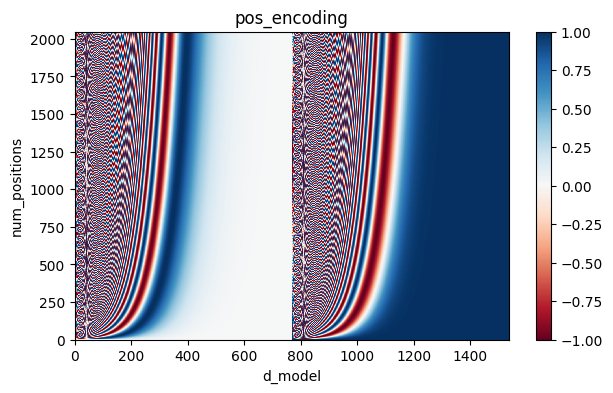

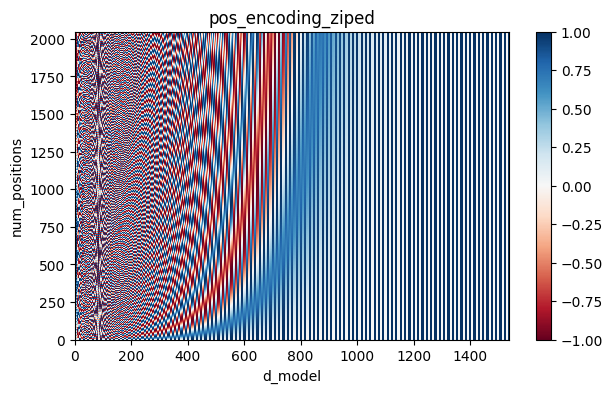

In [6]:
print('pos_encoding_ziped', pos_encoding_ziped.shape)

plot(pos_encoding[0], 'pos_encoding')
plot(pos_encoding_ziped[0], 'pos_encoding_ziped')
print('pos_encoding_ziped norm', np.linalg.norm(pos_encoding_ziped[0],axis=1))

origin_x norm tensor([16.0218, 16.2900, 16.0817,  ..., 16.4164, 15.8075, 16.0357],
       dtype=torch.float64)


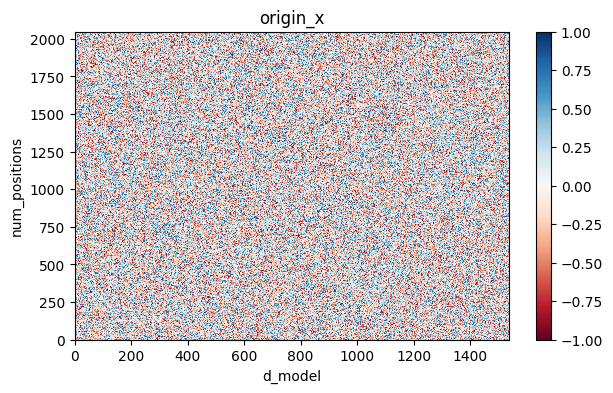

In [7]:
origin_x = torch.rand(num_positions, d_model) - np.random.rand(num_positions, d_model)
plot(origin_x, 'origin_x')
print('origin_x norm', torch.linalg.norm(origin_x,axis=1))

x2 norm tensor([32.1137, 32.4469, 32.2550,  ..., 32.3610, 32.4361, 32.6663],
       dtype=torch.float64)


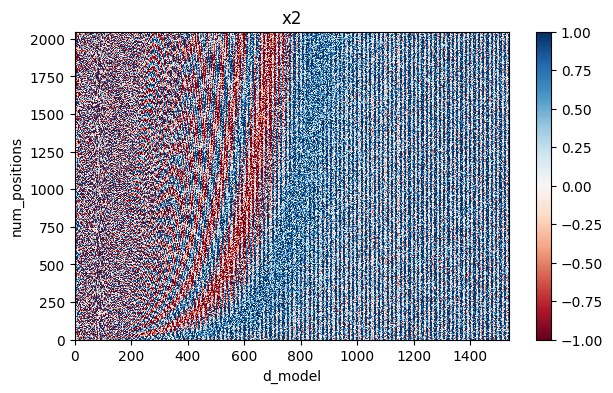

In [8]:
x2 = origin_x + pos_encoding_ziped[0]
plot(x2, 'x2')
print('x2 norm', torch.linalg.norm(x2,axis=1))